# Nettoyage pour Machine Learning : Titanic

Un modèle de machine learning se construit à travers un entrainement sur un jeu de données labélisées (etiquetées), c'est à dire un jeu de données avec résultat.

Le premier objectif est donc d'identifier la variable à prédire puis mettre en forme un maximum de lignes d'observations ainsi que leurs variables (colonnes) pour aider notre modèle à évaluer les corrélations significatives entre ces renseignements.

De cette maniere le modèle interprete les correlations significatives de chaque ligne d'observation (variables) avec son réultat (la colonne labelisée). 

En machine learning classique, le modele évalue ainsi le poids de chacune de ces colonnes (features) sur le resultat global.

Ainsi, le modele se calle pour etre capable de donner la bonne valeur pour chacune de ces variables.

Une fois entrainé, ce modèle peut donc prédire le résultation (la bonne etiquette) à une observation non labélisée (sans résultat)

L'objectif de ce notebook est de nettoyer inteligemment ce datastet pour rendre intelligible tous les renseignements cachés dans celui ci et obtenir la meilleur performance du modele de ML associé

https://www.kaggle.com/c/titanic

#### Inscris toi sur kaggle et download les fichiers de la competition sur le lien ci dessus

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot

# Chargement des jeux de données et préparation des train/test

#### Chargement du dataset de train et de test

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.sample(5)

PassengerId  Survived  Pclass  ...     Fare        Cabin  Embarked
353          354         0       3  ...   17.800          NaN         S
27            28         0       1  ...  263.000  C23 C25 C27         S
0              1         0       3  ...    7.250          NaN         S
816          817         0       3  ...    7.925          NaN         S
328          329         1       3  ...   20.525          NaN         S

[5 rows x 12 columns]

In [4]:
test.sample(5)

PassengerId  Pclass  ... Cabin Embarked
27           919       3  ...   NaN        C
332         1224       3  ...   NaN        C
41           933       1  ...   D34        S
165         1057       3  ...   NaN        S
147         1039       3  ...   NaN        S

[5 rows x 11 columns]

La seule colonne absente du Dataset de test est "Survived". C'est normal, le but du jeu est de construire un modele permettant de predire si le passager aurait survecu au nauffrage du Titanic en analysant uniquement les colonnes (features) suivantes :

In [6]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

"Survived" est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

Pouvez vous me dire combien de personne sur le dataset de train ont survécu ?

In [ ]:
train.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Et en pourcentage ?

In [ ]:
train.groupby('Survived')['Survived'].count()*100/len(train)

Survived
0    61.616162
1    38.383838
Name: Survived, dtype: float64

# Analyse du dataset

Survived est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

In [ ]:
train.describe(include="all")

PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Haas, Miss. Aloisia  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.699118    0.523008    0.381594     NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000     NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

Premieres remarques sur note jeu de données:

- 891 passagers
- 20% des informations sur leurs ages est manquantes 
- 75% des information cabines sont manquantes
- ...

Quelles variables sont correlees avec la chance de survie ?

Percentage de femme ayant survécu: 74.20382165605095
Percentage de homme ayant survécu: 18.890814558058924


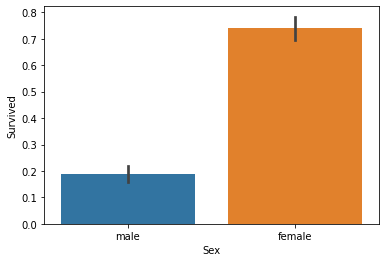

In [7]:

#Dessin d'un bar plot des survivants selon leurs sexe
sns.barplot(x="Sex", y="Survived", data=train)

print("Percentage de femme ayant survécu:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage de homme ayant survécu:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

#### Puisqu'il n'y a pas de Nan sur la colonne Sex, je les numerise tout de suite:
    
    male ==> 0
    
    female ==> 1

In [3]:
d_sex={'male':True,"female":False}

In [4]:
train['Sex']=train['Sex'].map(d_sex)
test['Sex']=test['Sex'].map(d_sex)


Quel impact de la classe sur la chance de survie ?

Percentage de Pclass = 1 qui a survécu:  62.96296296296296
Percentage de Pclass = 2 qui a survécu:  47.28260869565217
Percentage de Pclass = 3 qui a survécu:  24.236252545824847


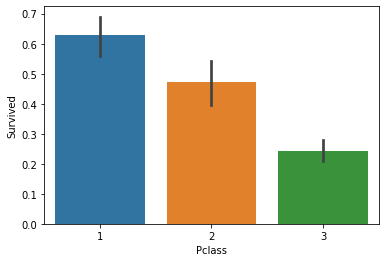

In [10]:

#Dessin d'un bar plot des survivants selon leurs sexe
sns.barplot(x="Pclass", y="Survived", data=train)

print("Percentage de Pclass = 1 qui a survécu: ", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage de Pclass = 2 qui a survécu: ", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage de Pclass = 3 qui a survécu: ", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)



#### Quel impact de l'age sur la chance de survie ?

In [11]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Petit problème pour cette feature (Age). En effet, 177 observations (lignes) du dataset n'ont pas d'age renseigné.

#### J'aimerais recuperer les Nan(s) de la colonne Age (20%) j'ai l'impression que c'est important.

Je vais créer un model de regression permettant de trouver l'age d'un passager en fonction(SibSp,Sex,Parch,Fare) (cf kaggle data pour description des colonnes)

Comme je n'ai pas beaucoup de données pour réaliser cette tache, je ne respecterai pas les standards pour réaliser un modele de ML (pas d'echantillon de validation)

Rappel ML : 


X.W = y 

==> Trouver la matrice de poids W qui minimise l'erreur de prediction

obs.W = prediction

Arbre de decision ex

Sample : - Sex 

              - Male

                    - Pclass 1

                    - Pclass 2 / 3

              - female

                    - Pclass 1

                            - Fare > 10 000 

                            - Fare < 10 000

                    - Pclass 2

                            - Fare > 5 000 ==> 22 (95%)

                            - Fare < 5 000 ==> 18 (75%)

                    - Pclass 3 

                            - Fare > 2 000 ==> 20 (65%)

                            - Fare < 2 000 ==> 17 (85%)

In [5]:
from sklearn.ensemble import RandomForestRegressor

X=train[['Pclass','Sex','SibSp','Parch','Age','Fare']].dropna(subset=['Age'])
y=X['Age'].copy()
del X['Age']

reg = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0).fit(X, y)
reg.score(X, y)

0.6779226125253888

Bon, c'est pas terrible comme R² 67,8% mais on va commencer comme cela 

==> Je sauve mon modèle (reg) en format pickle (.pkl)

In [17]:
import pickle
# save the model to disk
filename = 'age.sav'
pickle.dump(reg, open(filename, 'wb'))

In [18]:
# load the model from disk
reg = pickle.load(open(filename, 'rb'))
print(reg)

RandomForestRegressor(max_depth=14, random_state=0)


Je recupere l'index des lignes sans age et je les complete par la prediction de mon modele de prediction de l'age selon les colonnes ["Pclass",'Sex','SibSp','Parch','Fare']

In [6]:
ind_1=train[train['Age'].isna()].index
ind_2=test[test['Age'].isna()].index


In [7]:
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [8]:
train.loc[ind_1,"Age"]=reg.predict(train[train['Age'].isna()][["Pclass",'Sex','SibSp','Parch','Fare']])
test.loc[ind_2,"Age"]=reg.predict(test[test['Age'].isna()][["Pclass",'Sex','SibSp','Parch','Fare']])


#### Transformer un Age en label correspondant à un groupe social homogene :

['teen', 'young', 'Young adult', 'Adult junior', 'Adult senior', 'Adult', 'Senior']


Utiliser l'hyperparametre bins et label de la methode pd.cut() pour regrouper les ages par intervalles (dans un label) :

Mais avant tout, coupons notre serie en 7 groupes d'observations équilibrés avec pd.qcut


In [20]:
pd.qcut(train['Age'], 7)

0      (17.605, 22.0]
1        (35.0, 44.0]
2      (22.0, 26.292]
3        (30.0, 35.0]
4        (30.0, 35.0]
            ...      
886    (26.292, 30.0]
887    (17.605, 22.0]
888    (17.605, 22.0]
889    (22.0, 26.292]
890      (30.0, 35.0]
Name: Age, Length: 891, dtype: category
Categories (7, interval[float64]): [(0.419, 17.605] < (17.605, 22.0] < (22.0, 26.292] < (26.292, 30.0] <
                                    (30.0, 35.0] < (35.0, 44.0] < (44.0, 80.0]]

Je reprend ce découpage par intervalle que je nomme labels=[]) et essayons d'observer si un label a plus de chance de survie que d'autres

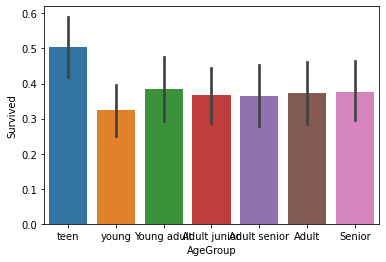

In [21]:
#classer les ages dans catégories
#train["Age"] = train["Age"]
#test["Age"] = test["Age"]
bins = [0, 17, 22, 26, 30, 35, 44, np.inf]
labels = ['teen', 'young', 'Young adult', 'Adult junior', 'Adult senior', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Ok donc pas grand chose ... L'age semble totalement independant, mais difficile d'y croire

Cette fois ci, prenons ce découpage et observons, l'impact de celui ci sur les chances de survie

bins = [0, 6, 11, 18, 24, 35, 63, np.inf]
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']

à vous de jouer

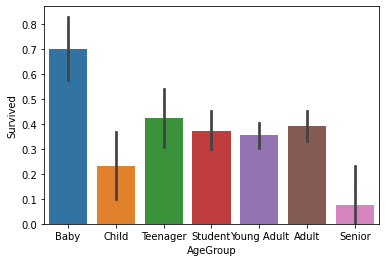

In [9]:
#classer les ages dans catégories
#train["Age"] = train["Age"]
#test["Age"] = test["Age"]
bins =  [0, 6, 11, 18, 24, 35, 63, np.inf] 
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)


#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Ok, c'est mieux, il y a clairement des "profils à risque" ... Encore eux ... ;)

# Extraction de renseignement sur les autres colonnes du dataset

De maniere plus large, combien y a t il de Nans ?

In [24]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
dtype: int64

Donc on travaille sur Cabin, Embarked pour la gestion des Nan.

Et après, on verra pour extraire de l'info des colonnes Ticket et Name

Notre échantillon d'entrainement est petit, eliminer les Nan et donc la ligne entière reduirait encore plus la taille de notre jeu d'entrainement

Comment conserver l'information de la ligne (observation) malgré ces Nan

In [26]:
train.sample(5)

PassengerId  Survived  Pclass  ...    Cabin  Embarked     AgeGroup
168          169         0       1  ...      NaN         S        Adult
848          849         0       2  ...      NaN         S  Young Adult
802          803         1       1  ...  B96 B98         S        Child
579          580         1       3  ...      NaN         S  Young Adult
846          847         0       3  ...      NaN         S        Child

[5 rows x 13 columns]

Nous pouvons remplacer ces Nan par une valeur defaut ? Ou essayer de le remplacer par une valeur proche de son profil (qualifier par les autre variables)

## Colonne cabin

Il faut trouver un truc pour celle là, beaucou de Nan, mais ça doit avoir une importance

In [27]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
B82 B84        1
E49            1
A26            1
B39            1
A6             1
Name: Cabin, Length: 147, dtype: int64

On peut remarquer deux choses: Les lettres donne une information geographique, et il peut y avoir plusieurs cabines pour les "gentrifiées". 

Conservons ces deux infos :

In [28]:
train['Cabin'].apply(lambda x :str(x)[0])

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: Cabin, Length: 891, dtype: object

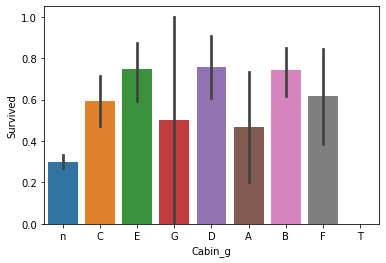

In [10]:
# Extrayons la lettre de l'id de la cabine
train['Cabin_g']=train['Cabin'].apply(lambda x :str(x)[0])
test['Cabin_g']=test['Cabin'].apply(lambda x :str(x)[0])

sns.barplot(x="Cabin_g", y="Survived", data=train)
plt.show()

ok, c'est pas mal, on garde. Il fallait mieux etre au E,D,B pour trouver une issue au nauffrage

Faite de meme avec le nombre de cabine et extrayez ces informations dans un colonne "Cabin_n"

Ainsi que le coté du couloir de/des cabine(s) à travers la parité du numéro de cabine ("Cabine_p)

In [12]:
def extract(chaine):
  try:
    if int(str(chaine).split()[0].strip()[1:]) % 2 == 0 :
      return 2
    else :
      return 1 
  except:
    return -1

In [13]:
train['Cabin_p']=train['Cabin'].apply(extract)
test['Cabin_p']=test['Cabin'].apply(extract)

In [14]:
train['Cabin_n']=train['Cabin'].apply(lambda x: len(str(x).split()) if type(x)==str else 0)
test['Cabin_n']=test['Cabin'].apply(lambda x: len(str(x).split()) if type(x)==str else 0)

Bon on va garder. Famille nombreuse en premier ?

Eliminer la colonne Cabin

In [15]:
del train['Cabin']
del test['Cabin']

In [61]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup', 'Cabin_g', 'Cabin_p',
       'Cabin_n'],
      dtype='object')

mapper les valeurs de la colonne Cabin_g avec le dictionnaire suivant (utilise la methode Series.map(dico)

{'E':8,'D':7,'B':6,'F':5,'C':4,'G':3,'A':2,'n':1,'T':0}

In [16]:
train["Cabin_g"]=train["Cabin_g"].map({'E':8,'D':7,'B':6,'F':5,'C':4,'G':3,'A':2,'n':1,'T':0})
test["Cabin_g"]=test["Cabin_g"].map({'E':8,'D':7,'B':6,'F':5,'C':4,'G':3,'A':2,'n':1,'T':0})


## Colonne embarked

In [78]:
print("Nombre de passager ayant embarqué à Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Nombre de passager ayant embarqué à Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Nombre de passager ayant embarqué à Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)


Nombre de passager ayant embarqué à Southampton (S):
644
Nombre de passager ayant embarqué à Cherbourg (C):
168
Nombre de passager ayant embarqué à Queenstown (Q):
77


remplaçons les valeurs manquantes de cette colonne par X et representer la chance de survie par element unique de la colonne "embarked"

In [17]:
train.Embarked.fillna('X',inplace=True)
test.Embarked.fillna('X',inplace=True)

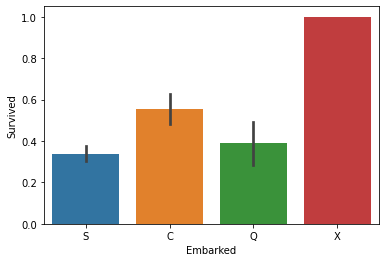

In [105]:
sns.barplot(x="Embarked", y="Survived", data=train)
plt.show()

mapper les valeurs de la colonne embarked

{"S": 1, "Q": 2, "C": 3,"X":4}

In [18]:
train['Embarked']=train['Embarked'].map({"S": 1, "Q": 2, "C": 3,"X":4})
test['Embarked']=test['Embarked'].map({"S": 1, "Q": 2, "C": 3,"X":4})

## Colonne ticket 

Extrayons le partie numerique (en mettant à 0 les Nan de cette colonne) et voyons ce que l'on peut en tirer

In [19]:
train['Ticket']=train['Ticket'].fillna('0').str.extract('([0-9]+)')
test['Ticket']=test['Ticket'].fillna('0').str.extract('([0-9]+)')
train['Ticket'].value_counts()

5         21
2         20
4          8
2343       7
1601       7
          ..
364500     1
349912     1
17465      1
392091     1
112277     1
Name: Ticket, Length: 635, dtype: int64

Trop de valeurs uniques, on peut retirer cette colonne. 

nb: Essayer de remplacer les valeurs non unique par un label "famille"

## Colonne Name

Comment gérer le nom des personnes devons nous tout jeter ou peut etre conserver des informations, comme son titre (Mr / Miss / Lord / ... ). Ces informations ont certainement une influence avec le target que nous souhaitons prédire (A t il survecu ?)

Si nos passagers ont un titre, tres courant à l'epoque, celui ci est situé en en tete du nom.
Extrayons les (avec .str.extract() // regex de pandas) et verifions si cela est coherent

In [20]:
train['Title']=train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test['Title']=test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [132]:


pd.crosstab(train['Title'], train['Sex'])

Sex            False  True 
Title                      
 Capt              0      1
 Col               0      2
 Don               0      1
 Dr                1      6
 Jonkheer          0      1
 Lady              1      0
 Major             0      2
 Master            0     40
 Miss            182      0
 Mlle              2      0
 Mme               1      0
 Mr                0    517
 Mrs             125      0
 Ms                1      0
 Rev               0      6
 Sir               0      1
 the Countess      1      0

Ah c'était la belle époque, "les femmes et les enfants d'abord !"

In [ ]:
pd.crosstab(train['Title'], train['Survived'])

Survived    0    1
Title             
Capt        1    0
Col         1    1
Countess    0    1
Don         1    0
Dr          4    3
Jonkheer    1    0
Lady        0    1
Major       1    1
Master     17   23
Miss       55  127
Mlle        0    2
Mme         0    1
Mr        436   81
Mrs        26   99
Ms          0    1
Rev         6    0
Sir         0    1

Y a t il beaucoup d'elements différents ?

In [133]:
train['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Mme               1
 the Countess      1
 Lady              1
 Ms                1
 Sir               1
 Don               1
 Jonkheer          1
 Capt              1
Name: Title, dtype: int64

Remplaçons certains titres peu fréquents par un label commun :

.replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

.replace(['Countess', 'Lady', 'Sir'], 'Royal')

.replace('Mlle', 'Miss')

.replace('Ms', 'Miss')
  
.replace('Mme', 'Mrs')

In [21]:
train['Title']=train['Title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
train['Title']=train['Title'].replace(['the Countess', 'Lady', 'Sir'], 'Royal')
train['Title']=train['Title'].replace('Mlle', 'Miss')
train['Title']=train['Title'].replace('Ms', 'Miss')
train['Title']=train['Title'].replace('Mme', 'Mrs')

test['Title']=test['Title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
test['Title']=test['Title'].replace(['the Countess', 'Lady', 'Sir'], 'Royal')
test['Title']=test['Title'].replace('Mlle', 'Miss')
test['Title']=test['Title'].replace('Ms', 'Miss')
test['Title']=test['Title'].replace('Mme', 'Mrs')


In [72]:
#train.loc[train['Title'].isin(['Countess', 'Lady', 'Sir']),'Title']='Royal'
train['Title'].value_counts()
test['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: Title, dtype: int64

Puis mapper chaque titre avec une valeur numérique

{"Mr": 1, "Miss": 4, "Mrs": 5, "Master": 3, "Royal": 6, "Rare": 2}

In [22]:
train['Title']=train['Title'].map({"Mr": 1, "Miss": 4, "Mrs": 5, "Master": 3, "Royal": 6, "Rare": 2})
test['Title']=test['Title'].map({"Mr": 1, "Miss": 4, "Mrs": 5, "Master": 3, "Royal": 6, "Rare": 2})

#### Revenons sur notre colonne Age

Cette colonne avait initialement beaucoup de Nans que nous avons remplacé par les predictions d'un modele.

Nous pouvons créer un nouveau modele qui predit l'age des passagers (lorsqu'ils sont manquants) mais en utilisant le dataset que nous venons de transformer.

Mainenant, ré entrainons un modele de prediction d'Age manquant et estimeons l'age des passagers à partir de ces nouveaux renseignements.

à vous de jouer

In [ ]:
train

In [24]:
from sklearn.ensemble import RandomForestRegressor

X=train[['Pclass','Sex','SibSp','Parch','Age','Fare',"Cabin_g","Cabin_p","Cabin_n","Title"]].dropna(subset=['Age'])

y=X['Age'].copy()
del X['Age']

reg = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0).fit(X, y)
reg.score(X, y)

0.7728092890884586

In [25]:
train.loc[ind_1,"Age"]=reg.predict(train.loc[ind_1][['Pclass','Sex','SibSp','Parch','Fare',"Cabin_g","Cabin_p","Cabin_n","Title"]])

test.loc[ind_2,"Age"]=reg.predict(test.loc[ind_2][['Pclass','Sex','SibSp','Parch','Fare',"Cabin_g","Cabin_p","Cabin_n","Title"]])



C'est encore mieux que tout à l'heure, prenons ce dernier model pour predire l'age (lorsqu'il n'etait pas renseigné) sur les observations 

nb: vous avez la variable ind, dans laquelle sont rangées les index de ces observations sans Age renseignees 

Allez y remplacer ces valeurs

In [ ]:
train.head(50)

In [26]:
bins =  [0, 6, 11, 18, 24, 35, 63, np.inf] 
labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

In [170]:
train['AgeGroup'].unique()

['Student', 'Adult', 'Young Adult', 'Baby', 'Teenager', 'Child', 'Senior']
Categories (7, object): ['Baby' < 'Child' < 'Teenager' < 'Student' < 'Young Adult' < 'Adult' <
                         'Senior']

Mappons la colonne AgeGroup

{'Student':3, 'Adult':5, 'Young Adult':4, 'Baby':7, 'Teenager':6, 'Child':2, 'Senior':1}


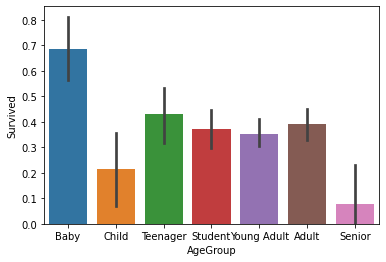

In [171]:
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [27]:
train['AgeGroup']=train['AgeGroup'].map({'Student':3, 'Adult':5, 'Young Adult':4, 'Baby':7, 'Teenager':6, 'Child':2, 'Senior':1})

test['AgeGroup']=test['AgeGroup'].map({'Student':3, 'Adult':5, 'Young Adult':4, 'Baby':7, 'Teenager':6, 'Child':2, 'Senior':1})

Conservons que les lignes sans Nan sur la colonne Ticket

In [29]:
train.dropna(inplace=True)
test.dropna(inplace=True)
train.shape

(887, 16)

Eliminons la colonne "Name" et "Ticket" et "PassengerID" avec .drop()

In [30]:
train.drop(['Ticket', 'PassengerId','Name'],axis=1,inplace=True)

id_test=list(test['PassengerId'])
test.drop(['Ticket', 'PassengerId','Name'],axis=1,inplace=True)
train.columns


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'AgeGroup', 'Cabin_g', 'Cabin_p', 'Cabin_n', 'Title'],
      dtype='object')

# Check des echantillons Train

In [31]:
train.to_csv('train_nettoye.csv',index=False)


In [183]:
train.sample(3)

Survived  Pclass   Sex        Age  ...  Cabin_g  Cabin_p  Cabin_n  Title
478         0       3  True  22.000000  ...        1       -1        0      1
249         0       2  True  54.000000  ...        1       -1        0      2
223         0       3  True  27.868567  ...        1       -1        0      1

[3 rows x 13 columns]

In [185]:
train.shape

(887, 13)

# Décomposition de l'echantillon train en sous train et sous test

Survived est la colonne à prédire de notre jeu d'entrainement. Chaque ligne correspond à un passager, il s'agit d'une observation. La colonne Survived nous indique si ce passager a survécu ou non au nauffrage du Titanic.

In [194]:
train.sample(3)

Survived  Pclass    Sex        Age  ...  Cabin_g  Cabin_p  Cabin_n  Title
721         0       3   True  17.000000  ...        1       -1        0      1
564         0       3  False  18.989586  ...        1       -1        0      4
310         1       1  False  24.000000  ...        4        2        1      4

[3 rows x 13 columns]

Nous l'appellerons target 

In [32]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived'], axis=1)
y = train["Survived"]


Nous gardons 20 %  de notre echantillon train qui est labelisé pour evaluer la performance de notre modele 

"Cross validation" pour rendre plus robuste l'evaluation du modele 

In [79]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [34]:
x_train.shape,  y_train.shape , x_val.shape , y_val.shape

((709, 12), (709,), (178, 12), (178,))

# Modélisation / Prédiction


#### STOP : Veille sur les modeles :

- RandomForest
- Naives Bayes
- LogisticRegression,

#### Piocher dans la librairie sklearn des modeles de classification (RandomForest, Naives Bayes, LogisticRegression) et realiser plusieurs modeles. 





In [80]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8,n_estimators=150)
clf.fit(x_train, y_train)

clf.score(x_val,y_val),clf.score(x_train,y_train)


(0.8651685393258427, 0.9153737658674189)

Reg Log

https://medium.com/tell-ia/la-r%C3%A9gression-logistique-expliqu%C3%A9e-%C3%A0-ma-grand-m%C3%A8re-52a2ab30788#:~:text=L'id%C3%A9e%20principale%20de%20la,dans%20la%20cat%C3%A9gorie%20%E2%80%9Cdiab%C3%A9tique%E2%80%9D.


t = w0 +w1X1 + w2X2 + w3X3
==> Sigmoid(t) € [0,1]

In [81]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=5,max_iter=800).fit(x_train, y_train)
clf.score(x_val, y_val),clf.score(x_train,y_train)


(0.8426966292134831, 0.8251057827926658)

#### Petit retour sur l'evaluation d'un modele de classification

Pour evaluer, plus en detail la précision du modele, utilisons une matrice de confusion.
Elle permet de visualiser rapidement le nombre d'éléments mal predits


Vous obtiendrez en colonne les valeurs réelles (0 , 1). Et en ligne, les valeurs predites (0 , 1). Maximiser les éléments sur la digonale est notre objectif (bon match prediction reel)


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, clf.predict(x_val))

array([[96, 15],
       [13, 54]])

En classification binaire, nous pouvons definir chacune des cases de ce tableau

![title](https://miro.medium.com/max/1890/1*OhEnS-T54Cz0YSTl_c3Dwg.jpeg)


    nb: Attention sur ce sch"ma les colonne et lignes sont inversées vs sklearn

Nous définissons deux indicateurs principaux pour évaluer un classifier

![title](https://miro.medium.com/max/1199/1*7J08ekAwupLBegeUI8muHA.png)

Et enfin le F1 score qui synthetise sa performance

![title](https://miro.medium.com/max/761/1*T6kVUKxG_Z4V5Fm1UXhEIw.png)


In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_val, clf.predict(x_val)))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       111
           1       0.78      0.81      0.79        67

    accuracy                           0.84       178
   macro avg       0.83      0.84      0.83       178
weighted avg       0.84      0.84      0.84       178



In [48]:
y_val.value_counts()

0    110
1     68
Name: Survived, dtype: int64

# Creation d'un fichier de soumission Kaggle

#### Transformons egalement notre test !

Pour comparer notre predicteur avec la communauté kaggle, nos devons renvoyer le dataframe test.csv documenté des predictions de survie.

Notre modele etant calé sur un nombre et un typage de colonne precis (celui qui lui a permis de s'entrainer),

Nous devons donc transformer notre dataframe test de la meme façon que nous avons fait pour le train.


==> Regrouper les sequences de transformation par thématiques communes et encapsulez les dans des fonctions.

==> Transformer le fichier test jusqu'a obtenir un fichier totalemnt numérisé (de la meme facon que le train) pour notre modele.

==> Réaliser un model.predict(test) (cf ci dessous)

In [84]:
#Le fichier de soumission contione un colonne passenger ID et une colonne survie ou non
predictions = clf.predict(test)

#Construction sous format csv
output = pd.DataFrame({ 'PassengerId' : id_test, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

#### Soumettez votre résultat sur https://www.kaggle.com/c/titanic ==> Submit Predictions

### Pour les Devs

Construisez une classe trans heritant de la classe DataFrame et implementer les fonctions de nettoyage/mise_en_forme comme méthodes de ce nouvel objet 